In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path

# Add project root to sys.path (not src)
project_root = Path.cwd().parent  # Should be RECSYS_FINAL
sys.path.append(str(project_root))

# Import specific modules/functions we want to test
from src import config
from src.data import load_raw
from src.data import utils
from src.data import preprocess  # Import the main preprocessing module

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
print("Setup complete. Modules imported.")

Loading .env from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/.env
Database URI configured: Yes
Setup complete. Modules imported.


In [2]:
# Test loading all raw data
try:
    raw_data = load_raw.load_all_raw_data()
    print("\nRaw data loaded successfully into 'raw_data' dictionary.")
    # Display shapes
    for name, df in raw_data.items():
        print(f"- {name}: {df.shape}")
except Exception as e:
    print(f"Error loading raw data: {e}")


--- Loading All Raw Data ---
All raw data files found.
Loading assessments data from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw/assessments.csv
Loaded assessments data shape: (206, 6)
Loading courses data from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw/courses.csv
Loaded courses data shape: (22, 3)
Loading student assessment data from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw/studentAssessment.csv
Loaded student assessment data shape: (173912, 5)
Loading student info data from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw/studentInfo.csv
Loaded student info data shape: (32593, 12)
Loading student registration data from: /Users/mohit/Desktop/everything/ATLAS/Semester 4/Pinnacle/recsys_final/data/raw/studentRegistration.csv
Loaded student registration data shape: (32593, 5)
Loading student VLE interaction data from: /Users/mohit/Desktop/ev

In [3]:
# Test cleaning studentInfo
student_info_clean = preprocess.clean_student_info(raw_data['student_info'])
print("\nCleaned studentInfo Head:\n", student_info_clean.head())
print("\nCleaned studentInfo Info:")
student_info_clean.info()
print("\nCleaned studentInfo Missing Values:\n", student_info_clean.isnull().sum())

# Test cleaning registrations
registrations_clean = preprocess.clean_registrations(raw_data['student_registration'])
print("\nCleaned registrations Head:\n", registrations_clean.head())
print("\nCleaned registrations Info:")
registrations_clean.info()

# Test cleaning assessments
assessments_clean = preprocess.clean_assessments(raw_data['assessments'])
print("\nCleaned assessments Head:\n", assessments_clean.head())

# Test cleaning studentAssessment
student_assessment_clean = preprocess.clean_student_assessment(raw_data['student_assessment'])
print("\nCleaned studentAssessment Head:\n", student_assessment_clean.head())
print("\nCleaned studentAssessment Info:")
student_assessment_clean.info()

# Test cleaning vle
vle_clean = preprocess.clean_vle(raw_data['vle'])
print("\nCleaned vle Head:\n", vle_clean.head())
print("\nCleaned vle Info:")
vle_clean.info()

# Test cleaning studentVle
student_vle_clean = preprocess.clean_student_vle(raw_data['student_vle'])
print("\nCleaned studentVle Head:\n", student_vle_clean.head())
print("\nCleaned studentVle Info:")
student_vle_clean.info()

Cleaning studentInfo data...
Filled 0 missing imd_band values with 'Missing'.
Creating 'presentation_id' column.
Cleaned studentInfo shape: (32593, 13)

Cleaned studentInfo Head:
   code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Leve

In [4]:
# Test filtering interactions by registration dates
interactions_filtered = preprocess.filter_interactions_by_registration(
    student_vle_clean, registrations_clean
)
print("\nFiltered Interactions Head:\n", interactions_filtered.head())
print(f"\nShape after filtering by registration: {interactions_filtered.shape}")

Filtering VLE interactions based on registration dates...
Merged interactions with registration info. Shape: (10654677, 10)
Filtered out 35231 interactions falling outside registration periods.
Filtered interactions shape: (10619446, 10)

Filtered Interactions Head:
   code_module code_presentation  id_student  id_site  date  sum_click  \
0         AAA             2013J       28400   546652   -10          4   
1         AAA             2013J       28400   546652   -10          1   
2         AAA             2013J       28400   546652   -10          1   
3         AAA             2013J       28400   546614   -10         11   
4         AAA             2013J       28400   546714   -10          1   

  presentation_id  
0       AAA_2013J  
1       AAA_2013J  
2       AAA_2013J  
3       AAA_2013J  
4       AAA_2013J  

Shape after filtering by registration: (10619446, 7)


Creating aggregated interaction features (implicit feedback)...
Created aggregated interaction features. Shape: (28987, 7)
   id_student presentation_id  total_clicks  interaction_days  \
0        6516       AAA_2014J          2791               159   
1        8462       DDD_2013J           646                56   
2        8462       DDD_2014J            10                 1   
3       11391       AAA_2013J           934                40   
4       23629       BBB_2013B           161                16   

   first_interaction_date  last_interaction_date  implicit_feedback  
0                     -23                    269           7.934513  
1                      -6                    118           6.472346  
2                      10                     10           2.397895  
3                      -5                    253           6.840547  
4                      -6                     87           5.087596  

Aggregated Interactions Head:
    id_student presentation_id  tot

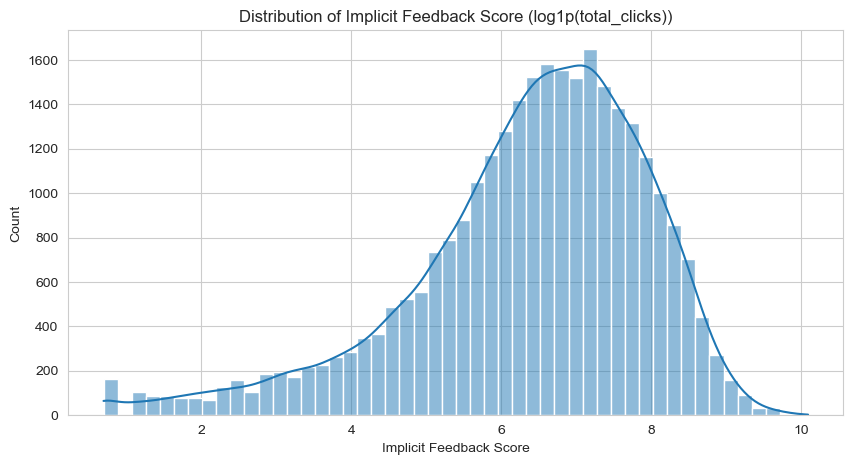

In [5]:
# Test creating aggregated interaction features
aggregated_interactions = preprocess.create_interaction_features(interactions_filtered)
print("\nAggregated Interactions Head:\n", aggregated_interactions.head())
print(f"\nShape of aggregated interactions: {aggregated_interactions.shape}")

# Plot distribution of implicit feedback score
plt.figure(figsize=(10, 5))
sns.histplot(aggregated_interactions['implicit_feedback'], bins=50, kde=True)
plt.title('Distribution of Implicit Feedback Score (log1p(total_clicks))')
plt.xlabel('Implicit Feedback Score')
plt.ylabel('Count')
plt.show()

In [6]:
# Test applying activity filters
# Use the default thresholds from config.py
final_interactions_filtered = preprocess.apply_activity_filters(aggregated_interactions)
print("\nInteractions after Activity Filters Head:\n", final_interactions_filtered.head())
print(f"\nShape after activity filters: {final_interactions_filtered.shape}")

print(f"\nUnique users remaining: {final_interactions_filtered['id_student'].nunique()}")
print(f"Unique items remaining: {final_interactions_filtered['presentation_id'].nunique()}")

AttributeError: module 'src.data.preprocess' has no attribute 'apply_activity_filters'

In [17]:
# Generate user features for the valid users found after filtering
valid_user_ids_test = final_interactions_filtered['id_student'].unique()
users_features_test = preprocess.generate_user_features(
    student_info_clean[student_info_clean['id_student'].isin(valid_user_ids_test)]
)
print("\nUser Features Head:\n", users_features_test.head())
print(f"\nShape of user features: {users_features_test.shape}")
# Verify shape matches unique user count
assert users_features_test.shape[0] == len(valid_user_ids_test)

Generating user features...
Generated user features table. Shape: (0, 8)
Empty DataFrame
Columns: [num_of_prev_attempts, studied_credits, gender_mapped, highest_education_mapped, imd_band_mapped, age_band_mapped, disability_mapped, region]
Index: []

User Features Head:
 Empty DataFrame
Columns: [num_of_prev_attempts, studied_credits, gender_mapped, highest_education_mapped, imd_band_mapped, age_band_mapped, disability_mapped, region]
Index: []

Shape of user features: (0, 8)


In [18]:
# Generate item features for the valid items found after filtering
valid_item_ids_test = final_interactions_filtered['presentation_id'].unique()
# Need courses_df with presentation_id
courses_with_pres_id = utils.create_presentation_id(raw_data['courses'])
items_features_test = preprocess.generate_item_features(
    courses_with_pres_id[courses_with_pres_id['presentation_id'].isin(valid_item_ids_test)],
    vle_clean[vle_clean['presentation_id'].isin(valid_item_ids_test)]
    # Add assessments_clean if those features are included in generate_item_features
)
print("\nItem Features Head:\n", items_features_test.head())
print(f"\nShape of item features: {items_features_test.shape}")
# Verify shape matches unique item count
assert items_features_test.shape[0] == len(valid_item_ids_test)

Creating 'presentation_id' column.
Generating item (presentation) features...
Generated item features table. Shape: (0, 1)
Empty DataFrame
Columns: [module_presentation_length]
Index: []

Item Features Head:
 Empty DataFrame
Columns: [module_presentation_length]
Index: []

Shape of item features: (0, 1)
